In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Carga el documento csv raw
df = pd.read_csv('/Users/chants/Desktop/Pset2_cucalon/data/raw/Airbnb_Data.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [5]:
print(df.head())

         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed     

In [6]:
print(df.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64


In [7]:
# Bathrooms
print(df[df['bathrooms'].isnull()])

             id  log_price property_type        room_type  \
33     10994968   4.488636         House     Private room   
38     12232154   4.744932     Apartment  Entire home/apt   
378    13559613   4.605170     Apartment     Private room   
644    13068133   4.488636     Apartment     Private room   
1351   13928644   5.164786     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
72631   3394508   5.521461     Apartment  Entire home/apt   
73040  13042752   4.595120     Apartment  Entire home/apt   
73362  19372893   4.248495     Apartment     Private room   
73377   3157330   4.465908         House     Private room   
73905  16134518   3.891820     Apartment     Private room   

                                               amenities  accommodates  \
33     {Internet,"Wireless Internet",Kitchen,"Pets li...             1   
38     {Internet,"Wireless Internet",Kitchen,"Pets al...             2   
378                                          

In [8]:
print(df[df['bathrooms'].isnull()][['property_type', 'room_type', 'accommodates']])

      property_type        room_type  accommodates
33            House     Private room             1
38        Apartment  Entire home/apt             2
378       Apartment     Private room             1
644       Apartment     Private room             1
1351      Apartment  Entire home/apt             2
...             ...              ...           ...
72631     Apartment  Entire home/apt             2
73040     Apartment  Entire home/apt             4
73362     Apartment     Private room             1
73377         House     Private room             4
73905     Apartment     Private room             2

[200 rows x 3 columns]


In [9]:
print(df['bathrooms'].value_counts(dropna=False))


bathrooms
1.0    58099
2.0     7936
1.5     3801
2.5     1567
3.0     1066
3.5      429
4.0      286
0.5      209
NaN      200
0.0      198
4.5      116
5.0       72
8.0       41
5.5       39
6.0       24
6.5       12
7.0       10
7.5        6
Name: count, dtype: int64


In [10]:
print(df['bathrooms'].describe())

count    73911.000000
mean         1.235263
std          0.582044
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: bathrooms, dtype: float64


In [11]:
# Mostrar solo las columnas 'beds' y 'bed_type'
print(df[['beds', 'bed_type']])

       beds  bed_type
0       1.0  Real Bed
1       3.0  Real Bed
2       3.0  Real Bed
3       2.0  Real Bed
4       1.0  Real Bed
...     ...       ...
74106   1.0  Real Bed
74107   4.0  Real Bed
74108   2.0  Real Bed
74109   2.0  Real Bed
74110   2.0  Real Bed

[74111 rows x 2 columns]


In [18]:
# Contar las ocurrencias de cada tipo de propiedad y tipo de habitación
property_counts = df['property_type'].value_counts()
room_counts = df['room_type'].value_counts()
bed_counts = df['bed_type'].value_counts()
beds_counts = df['beds'].value_counts()
bedrooms_counts = df['bedrooms'].value_counts()
scores_counts = df['review_scores_rating'].value_counts()
neighbourhood_counts = df['neighbourhood'].value_counts()
city_counts = df['city'].value_counts()


# Mostrar los resultados
print("Conteo de Property Types:")
print(property_counts)

Conteo de Property Types:
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island  

In [34]:
print(df['property_type'].describe())

count         74111
unique           35
top       Apartment
freq          49003
Name: property_type, dtype: object


In [15]:
print("\nConteo de Room Types:")
print(room_counts)


Conteo de Room Types:
room_type
Entire home/apt    41310
Private room       30638
Shared room         2163
Name: count, dtype: int64


In [33]:
print(df['room_type'].describe())

count               74111
unique                  3
top       Entire home/apt
freq                41310
Name: room_type, dtype: object


In [17]:
print("\nConteo de Bed Types:")
print(bed_counts)


Conteo de Bed Types:
bed_type
Real Bed         72028
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: count, dtype: int64


In [32]:
print(df['bed_type'].describe())

count        74111
unique           5
top       Real Bed
freq         72028
Name: bed_type, dtype: object


In [39]:
print("\nConteo de Neighbourhood:")
print(neighbourhood_counts)


Conteo de Neighbourhood:
neighbourhood
Williamsburg          2862
Bedford-Stuyvesant    2166
Bushwick              1601
Upper West Side       1396
Mid-Wilshire          1392
                      ... 
Mill Basin               1
Mt. Vernon Square        1
Chevy Chase, MD          1
Clearing                 1
Grant City               1
Name: count, Length: 619, dtype: int64


In [19]:
print(df['neighbourhood'].describe())

count            67239
unique             619
top       Williamsburg
freq              2862
Name: neighbourhood, dtype: object


In [36]:
print("\nConteo de Review Scores:")
print(scores_counts)


Conteo de Review Scores:
review_scores_rating
100.0    16215
98.0      4374
97.0      4087
96.0      4081
95.0      3713
93.0      3647
90.0      2852
99.0      2631
94.0      2618
80.0      2163
92.0      2064
91.0      1615
89.0      1120
87.0      1119
88.0      1056
85.0       625
86.0       512
60.0       444
84.0       438
83.0       403
82.0       211
70.0       196
73.0       157
81.0       126
75.0       101
20.0        97
78.0        94
40.0        90
79.0        83
76.0        76
77.0        74
67.0        66
74.0        39
72.0        38
50.0        30
65.0        28
68.0        20
71.0        14
69.0        13
63.0        11
53.0        10
64.0        10
47.0         5
30.0         4
62.0         3
66.0         3
55.0         3
57.0         3
27.0         2
35.0         1
49.0         1
58.0         1
54.0         1
56.0         1
Name: count, dtype: int64


In [21]:
print(df['review_scores_rating'].describe())

count    57389.000000
mean        94.067365
std          7.836556
min         20.000000
25%         92.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64


In [27]:
print("\nConteo de Bedrooms:")
print(bedrooms_counts)


Conteo de Bedrooms:
bedrooms
1.0     49784
2.0     11351
0.0      6715
3.0      4309
4.0      1330
5.0       355
6.0       106
7.0        38
8.0        14
10.0       10
9.0         8
Name: count, dtype: int64


In [25]:
print(df['bedrooms'].describe())

count    74020.000000
mean         1.265793
std          0.852143
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: bedrooms, dtype: float64


In [30]:
print("\nConteo de Beds:")
print(beds_counts)


Conteo de Beds:
beds
1.0     45144
2.0     16704
3.0      6442
4.0      3065
5.0      1287
6.0       661
7.0       216
8.0       186
10.0       88
9.0        72
16.0       38
12.0       29
11.0       23
13.0       10
15.0        6
14.0        4
0.0         4
18.0        1
Name: count, dtype: int64


In [31]:
print(df['beds'].describe())

count    73980.000000
mean         1.710868
std          1.254142
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         18.000000
Name: beds, dtype: float64


In [ ]:
print("\nConteo de Beds:")
print(city_counts)


Conteo de Beds:
city
NYC        32349
LA         22453
SF          6434
DC          5688
Chicago     3719
Boston      3468
Name: count, dtype: int64


In [40]:
# Mostrar estadísticas descriptivas de las variables
print(df[['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']].describe())

          bathrooms      bedrooms          beds  review_scores_rating
count  73911.000000  74020.000000  73980.000000          57389.000000
mean       1.235263      1.265793      1.710868             94.067365
std        0.582044      0.852143      1.254142              7.836556
min        0.000000      0.000000      0.000000             20.000000
25%        1.000000      1.000000      1.000000             92.000000
50%        1.000000      1.000000      1.000000             96.000000
75%        1.000000      1.000000      2.000000            100.000000
max        8.000000     10.000000     18.000000            100.000000


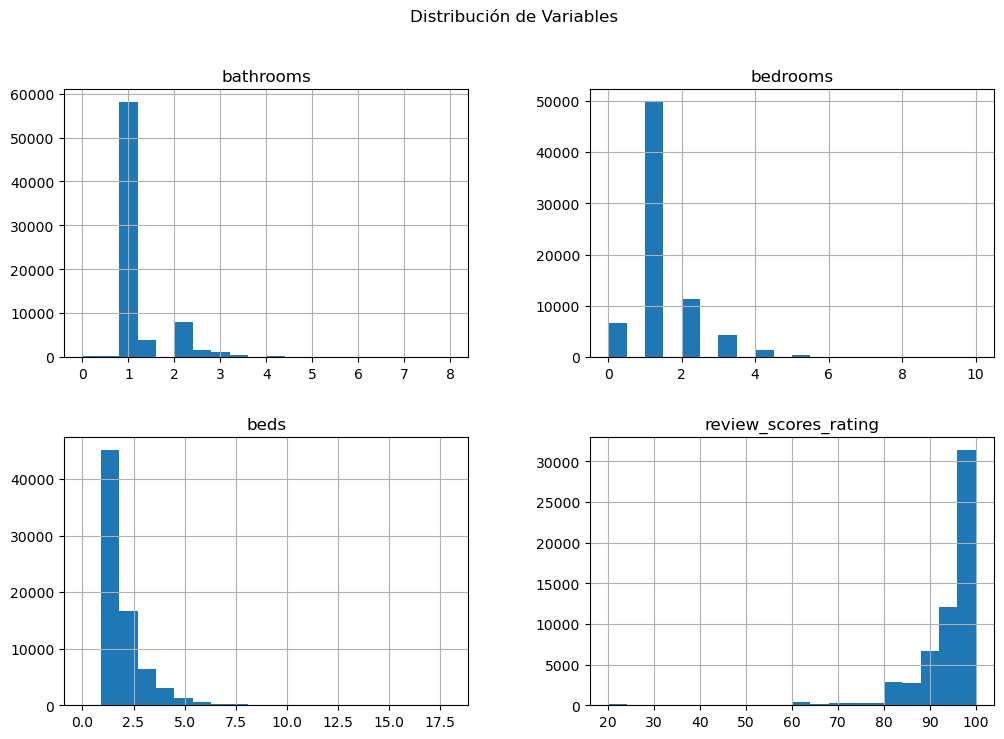

In [42]:
df[['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribución de Variables")
plt.show()

In [ ]:
df[['accommodates', 'bedrooms']]

,accommodates,bedrooms
0,3,1.0
1,7,3.0
2,5,1.0
3,4,2.0
4,2,0.0
...,...,...
74106,1,1.0
74107,4,2.0
74108,5,2.0
74109,2,0.0


Cantidad de outliers en log_price: 1532


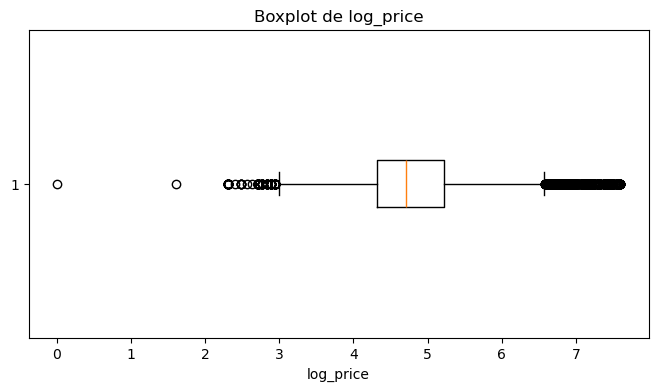

In [5]:
# Calcular el IQR (Rango Intercuartil)
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar outliers
outliers = df[(df['log_price'] < lower_bound) | (df['log_price'] > upper_bound)]
print(f"Cantidad de outliers en log_price: {outliers.shape[0]}")

# Visualizar con Boxplot
plt.figure(figsize=(8,4))
plt.boxplot(df['log_price'], vert=False)
plt.title("Boxplot de log_price")
plt.xlabel("log_price")
plt.show()

In [15]:
import numpy as np

# Calcular cuartiles
Q1 = df['log_price'].quantile(0.25)  # Primer cuartil (25%)
Q3 = df['log_price'].quantile(0.75)  # Tercer cuartil (75%)

# Calcular IQR (Rango Intercuartílico)
IQR = Q3 - Q1

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers menores y mayores
outliers_menores = df[df['log_price'] < limite_inferior]
outliers_mayores = df[df['log_price'] > limite_superior]

# Mostrar resultados
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")
print(f"Outlier menor:\n{outliers_menores['log_price'].min()}")
print(f"Outlier mayor:\n{outliers_mayores['log_price'].max()}")

Límite inferior: 2.9631865462232887
Límite superior: 6.574657392391346
Outlier menor:
0.0
Outlier mayor:
7.6004023345004


In [6]:
print(df[['bathrooms', 'log_price']].corr())

           bathrooms  log_price
bathrooms    1.00000    0.35542
log_price    0.35542    1.00000


In [8]:
print(df[['review_scores_rating', 'log_price']].corr())

                      review_scores_rating  log_price
review_scores_rating              1.000000   0.091219
log_price                         0.091219   1.000000


In [9]:
print(df[['bedrooms', 'log_price']].corr())

           bedrooms  log_price
bedrooms   1.000000   0.473212
log_price  0.473212   1.000000


In [10]:
print(df[['beds', 'log_price']].corr())

               beds  log_price
beds       1.000000   0.442153
log_price  0.442153   1.000000


In [14]:
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')  # Convierte y pone NaN en valores no convertibles
print(df[['zipcode', 'log_price']].corr())
# Si ya es numérico, calcular la correlación con log_price
print(df[['zipcode', 'log_price']].corr())

            zipcode  log_price
zipcode    1.000000   0.034023
log_price  0.034023   1.000000
            zipcode  log_price
zipcode    1.000000   0.034023
log_price  0.034023   1.000000


In [17]:
print(df[['accommodates', 'bedrooms', 'beds']].sample(20, random_state=42))

       accommodates  bedrooms  beds
4079              2       1.0   1.0
33735             2       1.0   1.0
69475             5       2.0   3.0
454               6       1.0   3.0
25153             2       1.0   1.0
42304             6       2.0   3.0
22686             5       2.0   1.0
20776             2       1.0   1.0
14934             2       1.0   1.0
39634             2       4.0   1.0
71413             1       1.0   1.0
7217              5       2.0   2.0
643               5       1.0   1.0
25819             2       1.0   1.0
44612             3       1.0   1.0
42830             2       1.0   1.0
40292             2       1.0   1.0
51300             2       1.0   1.0
66278             1       1.0   1.0
67769             4       0.0   1.0


Podria decirse que accomodates su mitad es bedrooms

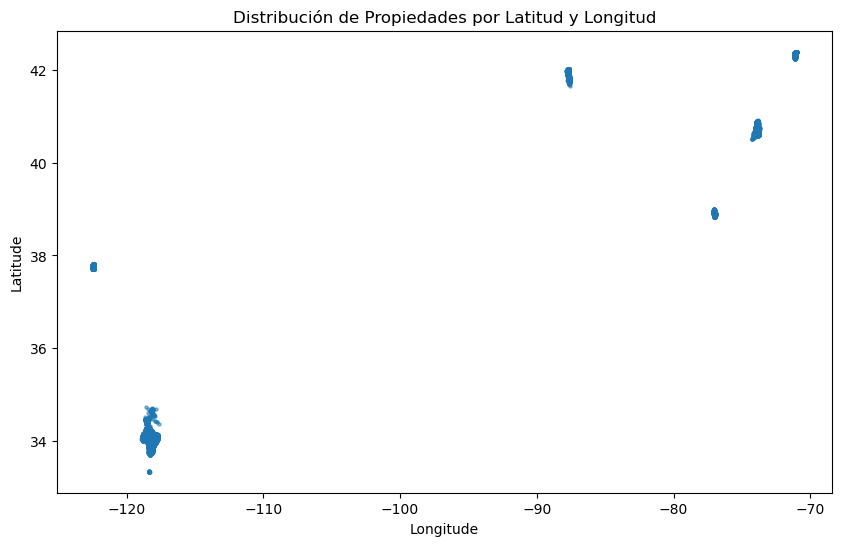

In [12]:
# Crear scatter plot de latitud y longitud
plt.figure(figsize=(10,6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, s=5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribución de Propiedades por Latitud y Longitud")
plt.show()

In [ ]:
duplicados = df.duplicated().sum()
print(f"Total de filas duplicadas: {duplicados}")

Total de filas duplicadas: 0
